<a href="https://colab.research.google.com/github/usugunawan15/hatespeech-detection/blob/main/hate_speech_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hate Speech Detection**
Usu Gunawan | DS0223

**Import Library**

In [6]:
! pip3 install nltk
! pip3 install Sastrawi
import Sastrawi
import nltk
nltk.download('punkt')
nltk.download('stopwords')

     |████████████████████████████████| 215kB 4.2MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import re
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

In [8]:
import requests
import io

response = requests.get('https://raw.githubusercontent.com/usugunawan15/hatespeech-detection/main/dataset_hatespeech.txt')
data = io.StringIO(response.text)

In [9]:
df = pd.read_csv(data,sep='\t')
df.head()

,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...


In [10]:
df['Label'].value_counts()

Non_HS    453
HS        260
Name: Label, dtype: int64

**Text Cleaning**

In [11]:
#Melakukan penghapusan data yang tidak relevan
casefold = []
for i in df['Tweet'] :
  try :
    removed = i.replace("RT", "") # Menghapus retweet
    removed = re.sub(r'@[A-Za-z0-9_]+', '', removed) # Menghapus username twitter
    removed = re.sub(r'https?:\\[^ ]+', '', removed) #Menghapus alamat website
    removed = re.sub(r'[\W+|_]+', ' ', removed).lower() #menghapus karakter spesial kecuali spasi

    casefold.append(removed)
  except :
    continue

In [12]:
clean = pd.DataFrame({'clean_text':casefold})
clean.head()

,clean_text
0,fadli zon minta mendagri segera menonaktifkan...
1,mereka terus melukai aksi dalam rangka memenj...
2,sylvi bagaimana gurbernur melakukan kekerasan ...
3,ahmad dhani tak puas debat pilkada masalah jal...
4,waspada ktp palsu kawal pilkada


**Stemming**

In [13]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# factory = StopWordRemoverFactory()
# stopword = factory.create_stop_word_remover()
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stemm = []
for i in casefold :
  hasil = stemmer.stem(i)
  stemm.append(hasil)

In [14]:
stem =pd.DataFrame({'stem': stemm})
stem.head()

,stem
0,fadli zon minta mendagri segera nonaktif ahok ...
1,mereka terus luka aksi dalam rangka penjara ah...
2,sylvi bagaimana gurbernur laku keras perempuan...
3,ahmad dhani tak puas debat pilkada masalah jal...
4,waspada ktp palsu kawal pilkada


**Tokenization**

In [15]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
clean_text = []
listStopword =  set(stopwords.words('indonesian'))
tokenized = []
for i in stemm :
  tokens = nltk.tokenize.word_tokenize(i)
  tokenized.append(tokens)

In [16]:
token = pd.DataFrame({'tokenized':tokenized})
token.head()

,tokenized
0,"[fadli, zon, minta, mendagri, segera, nonaktif..."
1,"[mereka, terus, luka, aksi, dalam, rangka, pen..."
2,"[sylvi, bagaimana, gurbernur, laku, keras, per..."
3,"[ahmad, dhani, tak, puas, debat, pilkada, masa..."
4,"[waspada, ktp, palsu, kawal, pilkada]"


**Remove Stop Words**

In [22]:
def remove_stopwords(txt_tokenized):
    txt_clear = [w for w in txt_tokenized if not w in listStopword]
    return txt_clear

df['no_sw'] = token['tokenized'].apply(lambda x: remove_stopwords(x))

In [23]:
df.head()

,Label,Tweet,no_sw
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,"[fadli, zon, mendagri, nonaktif, ahok, gubernu..."
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,"[luka, aksi, rangka, penjara, ahok, ahok, gaga..."
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,"[sylvi, gurbernur, laku, keras, perempuan, buk..."
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...","[ahmad, dhani, puas, debat, pilkada, jalan, be..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,"[waspada, ktp, palsu, kawal, pilkada]"


**Clean Text**

In [25]:
clean_text = []
for kata in df['no_sw']:
  joined = ' '.join(kata)
  clean_text.append(joined)

In [26]:
clean_text = pd.DataFrame({'clean':clean_text})
clean_text.head()

,clean
0,fadli zon mendagri nonaktif ahok gubernur dki
1,luka aksi rangka penjara ahok ahok gagal pilkada
2,sylvi gurbernur laku keras perempuan bukti ibu...
3,ahmad dhani puas debat pilkada jalan bekas
4,waspada ktp palsu kawal pilkada


**Word Cloud Image**

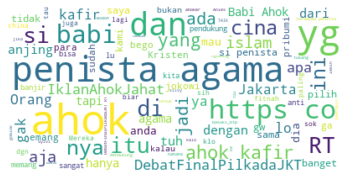

In [27]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Create and generate a word cloud image:
word = df.Tweet[df['Label']=='HS'].astype('string')
word.head()
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_text(' '.join(word))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


**Split Data**

In [28]:
df_train, df_test = train_test_split(df, test_size=0.2)

**Feature Extraction**

In [29]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(df['Tweet'])
Train_X_Tfidf = Tfidf_vect.transform(df_train['Tweet'])
Test_X_Tfidf = Tfidf_vect.transform(df_test['Tweet'])
y_train = df_train['Label'].to_numpy()
y_test = df_test['Label'].to_numpy()

In [41]:
def klasifikasi(df):
  classifier = SVC(kernel=df, random_state=1)
  classifier.fit(Train_X_Tfidf, y_train)

  y_pred = classifier.predict(Test_X_Tfidf)
 
  print('result = ')
  print('akurasi  =',accuracy_score(y_test, y_pred)*100,'%')

  print('presisi  =',precision_score(y_test, y_pred, average='macro')*100,'%')

  print('recall   =',recall_score(y_test, y_pred, average='macro')*100,'%')

  print('f1 score =',f1_score(y_test, y_pred, average='macro')*100,'%')

In [43]:
klasifikasi('sigmoid')

result = 
akurasi  = 84.61538461538461 %
presisi  = 87.88451160280626 %
recall   = 79.67032967032968 %
f1 score = 81.7093023255814 %


In [44]:
klasifikasi('rbf')

result = 
akurasi  = 78.32167832167832 %
presisi  = 85.32608695652173 %
recall   = 70.6043956043956 %
f1 score = 71.9873617693523 %


In [45]:
klasifikasi('linear')

result = 
akurasi  = 84.61538461538461 %
presisi  = 86.95482866043614 %
recall   = 80.08241758241759 %
f1 score = 81.94444444444444 %


In [53]:
classifier = SVC(kernel="linear", random_state=1)
classifier.fit(Train_X_Tfidf, y_train)
y_pred = classifier.predict(Test_X_Tfidf)

In [54]:
df_pred = df_test.copy()
df_pred['prediksi'] = y_pred
df_pred['true_prediction'] = np.where(df_pred['prediksi'] == df_test['Label'], True, False)
df_pred.to_excel("prediksi.xlsx")

In [57]:
pd.set_option('display.max_colwidth', -1)
df_diff = df_pred.loc[df_pred['true_prediction'] == True]
display(df_diff)

,Label,Tweet,no_sw,prediksi,true_prediction
407,Non_HS,Pak saya setuju kalo pak jadi gubenur karena kerja pak sangat bagus kerena kerja pak basuki tegas keluarga kami mendukung pak basuki,"[tuju, kalo, gubenur, kerja, bagus, rena, kerja, basuki, keluarga, dukung, basuki]",Non_HS,True
93,Non_HS,Gimana ya Tim Ahok kok makin disudutkan(?) Mungkin karena ini final kali y,"[gimana, ya, tim, ahok, sudut, final, kali, y]",Non_HS,True
315,Non_HS,"Terimakasih Pak @basukibtp untuk 5 tahunnya, 3 tahun sbg wakil gubernur & 2 tahun sbg gubernur!","[terimakasih, 5, 3, sbg, wakil, gubernur, 2, sbg, gubernur]",Non_HS,True
605,HS,"@AHMADDHANIPRAST aku katakan anjing kpd ahmad dani, boleh....aku katakan babi kpd ahmad dhani, boleh...","[anjing, kpd, ahmad, babi, kpd, ahmad, dhani]",HS,True
331,Non_HS,Semangat terus. Maju terus di dalam TUHAN. God Bless you more and forever bpk ahok dan family,"[semangat, maju, tuhan, god, bless, you, more, and, forever, bpk, ahok, family]",Non_HS,True
...,...,...,...,...,...
322,Non_HS,Terima kasih pak ahok pak djarot kami bangga perna di pimpin sama bapak berdua...tetap semangat...sukses terus pak,"[terima, kasih, ahok, djarot, bangga, perna, pimpin, semangat, sukses]",Non_HS,True
401,Non_HS,"Bapak ahok sosok yang saya banggakan, terimakasih pak sudah merubah jakarta.","[ahok, sosok, bangga, terimakasih, rubah, jakarta]",Non_HS,True
255,Non_HS,19 April adalah saat yang penting bagi warga Jakarta untuk menentukan masa depan Ibukota,"[19, april, warga, jakarta, ibukota]",Non_HS,True
562,HS,@budimandjatmiko ahok si kutil babi kembali ke rumah lembang kenapa jakarta jadi banjir bud?,"[ahok, si, kutil, babi, rumah, lembang, jakarta, banjir, bud]",HS,True
